In [1]:
import pandas as pd


In [2]:
dftitanic=pd.read_csv('titanic.csv')
dftitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dftitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
dftitanic[dftitanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [6]:
import numpy as np


In [12]:
dftitanic['cabin_null']=np.where(dftitanic['Cabin'].isnull(),1,0)

In [14]:
dftitanic['cabin_null'].mean()

0.7710437710437711

In [15]:
dftitanic.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

# Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [16]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [17]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [20]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [21]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
595    36.00
637    31.00
54     65.00
456    65.00
110    47.00
287    22.00
315    26.00
691     4.00
811    39.00
861    21.00
15     55.00
239    33.00
644     0.75
394    24.00
795    39.00
131    20.00
346    40.00
9      14.00
477    29.00
606    30.00
469     0.75
325    36.00
72     21.00
724    27.00
40     40.00
       ...  
396    31.00
452    30.00
395    22.00
882    22.00
821    27.00
314    43.00
622    20.00
204    18.00
60     22.00
731    11.00
81     29.00
676    24.50
433    17.00
378    20.00
174    56.00
624    21.00
642     2.00
157    30.00
427    19.00
698    49.00
179    36.00
24      8.00
630    80.00
458    50.00
49     18.00
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [27]:
def Impute_NaN(df,variable,median):
    df[variable+'_Median']=df[variable].fillna(median)
    df[variable+'_RS']=df[variable].fillna(median)
    #It will have random sample to fill na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #pands need to have the same index as na values in order to merge the data set
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_RS']=random_sample

In [38]:
median=df.Age.median()
median

28.0

In [39]:
Impute_NaN(df,'Age',median)

In [40]:
df[df.Age.isnull()]

,Survived,Age,Fare,Age_Median,Age_RS
5,0,NaN,8.4583,28.0,28.00
17,1,NaN,13.0000,28.0,50.00
19,1,NaN,7.2250,28.0,0.92
26,0,NaN,7.2250,28.0,36.00
28,1,NaN,7.8792,28.0,26.00
29,0,NaN,7.8958,28.0,36.00
31,1,NaN,146.5208,28.0,31.00
32,1,NaN,7.7500,28.0,65.00
36,1,NaN,7.2292,28.0,65.00
42,0,NaN,7.8958,28.0,47.00


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

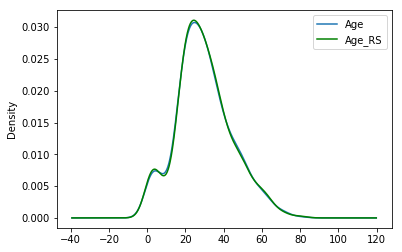

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
#df.Age_Median.plot(kind='kde', ax=ax, color='red')
df.Age_RS.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Advantages
    1.Easy To implement
    2.There is less distortion in variance


# Disadvantage
    1.Every situation randomness wont work
    2.Capturing NAN values with a new feature
    3.It works well if the data are not missing completely at random

## Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [45]:
df=pd.read_csv(r'D:\DATA ANALYST\Krish Naik\Feature-Engineering-Live-sessions-master\titanic.csv',usecols=['Age','Fare','Survived'])

In [46]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [48]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [49]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [55]:
df.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# Advantages
Easy to implement
Captures the importance of missing values

# Disadvantages
Creating Additional Features(Curse of Dimensionality)

# End of Distribution imputation¶

In [2]:
import pandas as pd
df=pd.read_csv(r'D:\DATA ANALYST\Krish Naik\Feature-Engineering-Live-sessions-master\titanic.csv',usecols=['Age','Fare','Survived'])
df.Age.hist(bins=50)

In [3]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

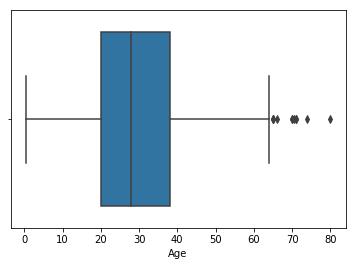

In [4]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [5]:

def impute_nan(df,variable,median,extreme):
    df[variable+"_EndDistribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [6]:
median=df.Age.median()
impute_nan(df,'Age',median,extreme)
df.head(20)

,Survived,Age,Fare,Age_EndDistribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

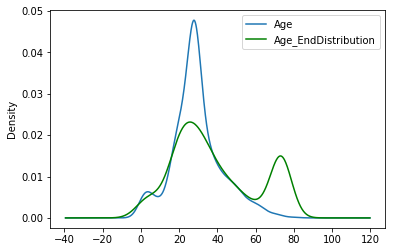

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
#df.Age_Median.plot(kind='kde', ax=ax, color='red')
df.Age_EndDistribution.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

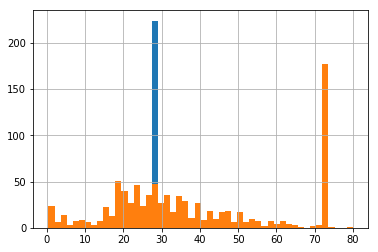

In [10]:
df['Age'].hist(bins=50)
df['Age_EndDistribution'].hist(bins=50)

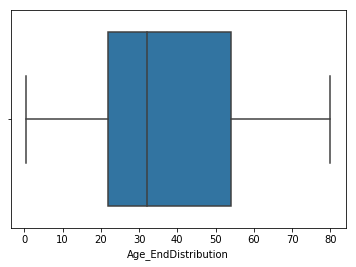

In [11]:
import seaborn as sns
sns.boxplot('Age_EndDistribution',data=df)

# Advantages
Easy to implement

Captures the importance of missing values
# Disadvantages

Distort the original distribution of the variable.

If missing is not important, it may mask the predictive power of the original variable by distorting its ditribution.

If the number of NA is big, it will mask true outliers in the distribution

If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent feture engineering.

-----------------------------------------------------------

# Arbitrary Value Imputation
This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [12]:
import pandas as pd
df=pd.read_csv(r'D:\DATA ANALYST\Krish Naik\Feature-Engineering-Live-sessions-master\titanic.csv',usecols=['Age','Fare','Survived'])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [14]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

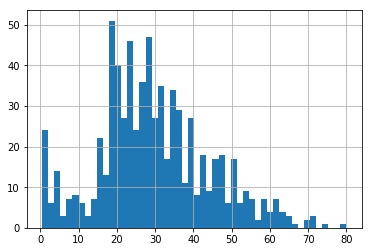

In [15]:
df['Age'].hist(bins=50)

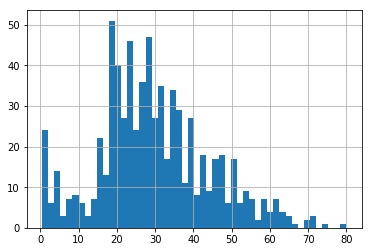

In [16]:
impute_nan(df,'Age')
df['Age_zero'].hist(bins=50)


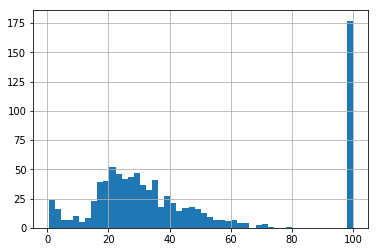

In [19]:
df['Age_hundred'].hist(bins=50)

# Disadvantages

Hard to decide which value to use

----------------------------------------